# Pneumonia with small dataset
submit by:
daniel zaguri - 203289780
elad ben haim - 301416467

* [Preprocessing the data](#pre)
* [First NN with no augmentation](#fnn)
* [First results analysis before augmentation](#res1)
* [data augmentation](#aug)
* [NN with augmentation](#snn)
* [Second results analysis after augmentation](#res2)

In [31]:
import keras
import os, shutil

In [32]:
# The directory where we will
# store our smaller dataset
base_dir = 'Pneumonia_Normal'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

In [33]:
p_original_dataset_dir = 'chest_xray/train/PNEUMONIA'
n_original_dataset_dir = 'chest_xray/train/NORMAL'
l_p = []
l_n = []
l_p = os.listdir(p_original_dataset_dir) # dir is your directory path
l_n = os.listdir(n_original_dataset_dir) # dir is your directory path

<a id='pre'></a>

## Preprocessing

In [34]:
# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

# Directory with our training pneumonia pictures
train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')
if not os.path.exists(train_pneumonia_dir):
    os.mkdir(train_pneumonia_dir)
# Directory with our training normal pictures
train_normal_dir = os.path.join(train_dir, 'NORMAL')
if not os.path.exists(train_normal_dir):
    os.mkdir(train_normal_dir)

# Directory with our validation pneumonia pictures
validation_pneumonia_dir = os.path.join(validation_dir, 'PNEUMONIA')
if not os.path.exists(validation_pneumonia_dir):
    os.mkdir(validation_pneumonia_dir)

# Directory with our validation normal pictures
validation_normal_dir = os.path.join(validation_dir, 'NORMAL')
if not os.path.exists(validation_normal_dir):
    os.mkdir(validation_normal_dir)

# Directory with our validation pneumonia pictures
test_pneumonia_dir = os.path.join(test_dir, 'PNEUMONIA')
if not os.path.exists(test_pneumonia_dir):
    os.mkdir(test_pneumonia_dir)

# Directory with our validation normal pictures
test_normal_dir = os.path.join(test_dir, 'NORMAL')
if not os.path.exists(test_normal_dir):
    os.mkdir(test_normal_dir)
    
p_len = len(l_p)
n_len = len(l_n)
# Copy first 2000 pneumonia images to train_pneumonia_dir
fnames = [l_p[i] for i in range(792)]
for fname in fnames:
    src = os.path.join(p_original_dataset_dir, fname)
    dst = os.path.join(train_pneumonia_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 1000 pneumonia images to validation_pneumonia_dir
fnames = [l_p[i] for i in range(792, 1188)]
for fname in fnames:
    src = os.path.join(p_original_dataset_dir, fname)
    dst = os.path.join(validation_pneumonia_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 1274 pneumonia images to test_pneumonia_dir
fnames = [l_p[i] for i in range(1188, 1583)]
for fname in fnames:
    src = os.path.join(p_original_dataset_dir, fname)
    dst = os.path.join(test_pneumonia_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 normal images to train_normal_dir
fnames = [l_n[i] for i in range(792)]
for fname in fnames:
    src = os.path.join(n_original_dataset_dir, fname)
    dst = os.path.join(train_normal_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 normal images to validation_normal_dir
fnames = [l_n[i] for i in range(792, 1188)]
for fname in fnames:
    src = os.path.join(n_original_dataset_dir, fname)
    dst = os.path.join(validation_normal_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_normal_dir
fnames = [l_n[i] for i in range(1188, 1583)]
for fname in fnames:
    src = os.path.join(n_original_dataset_dir, fname)
    dst = os.path.join(test_normal_dir, fname)
    shutil.copyfile(src, dst)

In [35]:
print('total training pneumonia images:', len(os.listdir(train_pneumonia_dir)))
print('total training normal images:', len(os.listdir(train_normal_dir)))
print('total validation pneumonia images:', len(os.listdir(validation_pneumonia_dir)))
print('total validation normal images:', len(os.listdir(validation_normal_dir)))
print('total test pneumonia images:', len(os.listdir(test_pneumonia_dir)))
print('total test normal images:', len(os.listdir(test_normal_dir)))

total training pneumonia images: 792
total training normal images: 792
total validation pneumonia images: 396
total validation normal images: 396
total test pneumonia images: 395
total test normal images: 395


<a id='fnn'></a>

## First NN with no augmentation

In [36]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [38]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [39]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=15,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=15,
        class_mode='binary')

Found 1584 images belonging to 2 classes.
Found 792 images belonging to 2 classes.


In [40]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (15, 150, 150, 3)
labels batch shape: (15,)


In [41]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 140s 1s/step - loss: 0.5287 - acc: 0.7517 - val_loss: 0.3501 - val_acc: 0.8613
Epoch 2/30
100/100 [==============================] - 132s 1s/step - loss: 0.3011 - acc: 0.8701 - val_loss: 0.3263 - val_acc: 0.8533
Epoch 3/30
100/100 [==============================] - 105s 1s/step - loss: 0.2104 - acc: 0.9170 - val_loss: 0.1981 - val_acc: 0.9253
Epoch 4/30
100/100 [==============================] - 109s 1s/step - loss: 0.1761 - acc: 0.9257 - val_loss: 0.1702 - val_acc: 0.9293
Epoch 5/30
100/100 [==============================] - 106s 1s/step - loss: 0.1580 - acc: 0.9371 - val_loss: 0.2928 - val_acc: 0.8960
Epoch 6/30
100/100 [==============================] - 104s 1s/step - loss: 0.1519 - acc: 0.9458 - val_loss: 0.1637 - val_acc: 0.9387
Epoch 7/30
100/100 [==============================] - 108s 1s/step - loss: 0.1403 - acc: 0.9485 - val_loss: 0.1615 - val_acc: 0.9360
Epoch 8/30
100/100 [==============================] - 105s 1s/step - 

<a id='res1'/>

## Results analysis

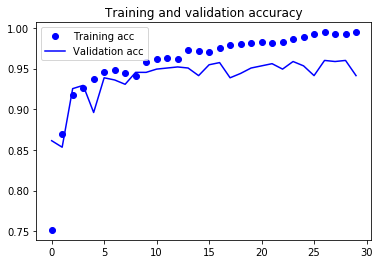

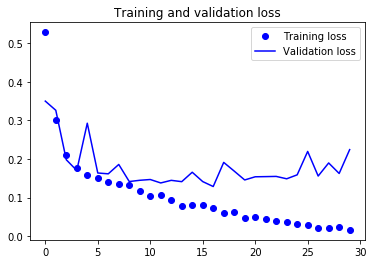

In [42]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<a id='aug'></a>

## Data augmentation

In [43]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

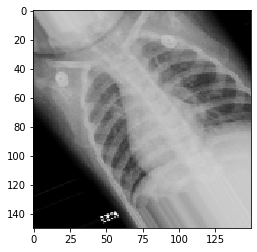

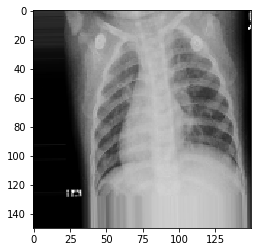

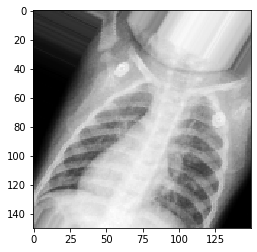

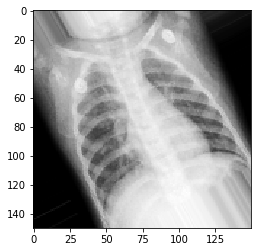

In [44]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_pneumonia_dir, fname) for fname in os.listdir(train_pneumonia_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

<a id="snn"/>

## NN with augmentation

In [56]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [57]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=24,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=24,
        class_mode='binary')

Found 1584 images belonging to 2 classes.
Found 792 images belonging to 2 classes.


In [58]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (24, 150, 150, 3)
labels batch shape: (24,)


In [65]:
history = model.fit(
      train_generator,
      steps_per_epoch=50,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=25)

Epoch 1/50
50/50 [==============================] - 125s 2s/step - loss: 0.1943 - acc: 0.9283 - val_loss: 0.4593 - val_acc: 0.8083
Epoch 2/50
50/50 [==============================] - 109s 2s/step - loss: 0.1912 - acc: 0.9350 - val_loss: 0.2359 - val_acc: 0.9000
Epoch 3/50
50/50 [==============================] - 134s 3s/step - loss: 0.2111 - acc: 0.9258 - val_loss: 0.1959 - val_acc: 0.9233
Epoch 4/50
50/50 [==============================] - 142s 3s/step - loss: 0.1977 - acc: 0.9208 - val_loss: 0.2081 - val_acc: 0.9083
Epoch 5/50
50/50 [==============================] - 150s 3s/step - loss: 0.2026 - acc: 0.9233 - val_loss: 0.5065 - val_acc: 0.8033
Epoch 6/50
50/50 [==============================] - 150s 3s/step - loss: 0.1958 - acc: 0.9250 - val_loss: 0.1578 - val_acc: 0.9433
Epoch 7/50
50/50 [==============================] - 126s 3s/step - loss: 0.2098 - acc: 0.9233 - val_loss: 0.2277 - val_acc: 0.9200
Epoch 8/50
50/50 [==============================] - 118s 2s/step - loss: 0.1803 - a

<a id='res2'/>

## Results analysis

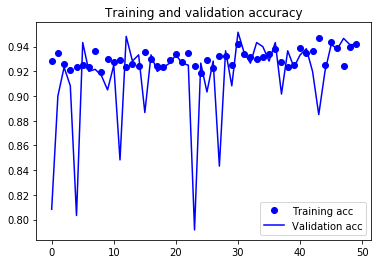

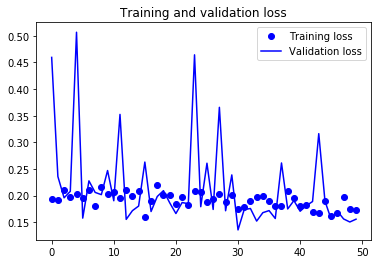

In [66]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()